# Lab : Descente de gradient stochastique

Nous allons implémenter un algorithme de déscente de gradient stochastique avec Python en utilisant la librarie `numpy` (et `matplotlib`pour la visualisation). L'objectif de ce TP est de visualiser le fonctionnement de l'algorithme de descente de gradient et de comprendre le rôle des valeurs d'hyper-paramètres que l'on peut utiliser. 

Vous avez besoin des libraries suivantes:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd


## Data

Les données utilisées dans ce TP représentent les notes des étudiants et les décisions associées (admis ou recallé). Chaque ligne correspond à une candidature spécifique. Les "features" sont ses notes sur deux examens différents. La colonne finale donne le "label" qui indique si l'étudiant est admis ou pas au programme de Master.

In [5]:
data = np.loadtxt("./data.txt", delimiter=",")

##### Question 1

On note n=100 le nombre d'étudiants. À partir de `data`. Créer:
- une matrice $X$ de taille $n\times3$ features où la première feature est un $1$ et les features 2 et 3 correspondent aux notes
- un vecteur $Y$ de taille $n$.

Indication: on rapelle les manipulations suivantes pour des "numpy arrays":
```
data[0,:] # première ligne
data[:,0] # première colonne
data[0,1] # deuxième élément de la première ligne

data[:,0:2] # Deux premières colonnes
data[:,2] # troisième colonne

X = np.ones((50,3)) # array de taille 50x3 rempli de "0"
X[:,1] = data[:,0] # On rempli la deuxième colonne de X avec la première de "data". 
```

Visualiser les données sur un graphe en utilisant deux couleurs différentes (une pour les étudiants refusés et une pour les étudiants acceptés). (hint: essayer `plt.scatter(X[:,1], X[:,2], c=Y)`).

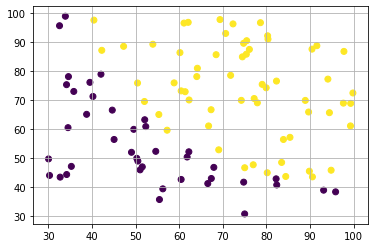

In [6]:
n = len(data)

X = np.ones((n, 3))
X[:,1] = data[:,0]
X[:,2] = data[:,1]
Y = np.zeros((n, 1))
Y = data[:,2]
plt.scatter(X[:,1], X[:,2], c=Y)
plt.grid(True)
plt.show()

### Le modèle

Nous allons implémenter modèle de regression logistique. Pour cela, on définit la fonction sigmoïde $\sigma$, qui prend un nombre réel $a$ et rend:
$$\sigma(a) = \frac{1}{1+\exp(-a)}.$$

Pour une prédiction $p\in[0,1]$ et un label $y\in\{0,1\}$, on définit aussi la perte d'entropie croisée comme
$$\mathrm{loss}(p, y) = -y\log(p) - (1-y)\log(1-p).$$

Le but du TP est d'écrire un algorithme de descente de gradient qui minimise l'erreur empirique, définie comme
$$ E(w) = \sum_i \mathrm{loss}(\sigma(w^TX_i), Y_i),$$
où $w$ est un vecteur de poids et $w^TX_i = \sum_j w_j X_{ij}$, avec $X$ et $Y$ définis comme à la question précédnte.

##### Question 2: 
Dans cette question, $x$ et $w$ désignent des vecteurs (de taille 3). Typiquement, $x$ sera une des valeurs $X[i]$ du tableau défini à la question $0$. 

Écrire les fonctions suivantes:
- une fonction `prediction(w, x)` qui prend en entrée un vecteur de poids $w$, des features $x$ et rend une prédiction $\sigma(w^Tx)$
- une fonction `loss(p, y)` qui prend en entrée une probabilité $p\in(0,1)$ et un "label" $y\in\{0,1\}$ et qui rend $\mathrm{loss}(p, y)$. 
- une fonction `gradient(w, x, y)` qui prend en entrée un poids $w$ (vecteur de longueur $3$), un vecteur $x$ (de longueur $3$) et un label $y\in\{0,1\}$ et qui calcule le gradient de $loss(\sigma(w^Tx), y)$ par rapport à $w$. 

In [12]:
# TODO
dimension = 3

def result_wTx(w, x):
    return np.dot(w, x) # w@x

def sigmoid(a):
    return 1/(1 + np.exp(-a))

def prediction(w, x):
    return sigmoid(result_wTx(w, x))

def loss(p, y):
    p = np.clip(p, 1e-10, 1-1e-10)
    return -y*np.log(p) - (1-y)*np.log(1-p)

def gradient(w, x, y):
    return (prediction(w, x) - y) * x
     

### Algorithme de gradient stochastique. 

Notre réseau est paramétré par un vecteur de poids $\mathbf{w} = [w_0,w_1,w_2]$ ($w_0$ est le terme de biais, les coefficients $w_1$ et $w_2$ sont pour chaque note). On va effectuer l'algorithmes suivant: 

```
- Initialiser le vecteur W avec des poids aléatoires. 
- Pour t=0 à nombre_de_pas
    - Choisir un exemple $i$ au hasard. 
    - W := W - taille_du_pas(t) * gradient(W, x[i], y[i]) 
````

où `pas(t)` est une fonction que l'on aura défini avant. 


##### Question 3
Écrire une fonction `SGD(X, Y, nombre_de_pas, taille_du_pas)` qui prend en entrée l'ensemble de donnée de départ un `nombre_de_pas` (entier) et une fonction `taille_du_pas` et vous rend:
- un vecteur `W_en_fonction_de_t` de taille `3 x nombre_de_pas` où `W_en_fonction_de_t[t]` est le poids $W$ à l'itération $t$ de l'algorithme.
- un vecteur `L_en_fonction_de_t` de taille `nombre_de_pas`où `L_en_fonction_de_t[t]` est $\sum_i \mathrm{loss}(\sigma(Ws[t],x),y))$

In [15]:
def SGD(X, Y, nombre_de_pas, taille_du_pas):
    Ws = np.zeros((nombre_de_pas, dimension))
    Ls = np.zeros(nombre_de_pas)
    w = np.random.rand(3)*0.01
    l = 0
    for t in range(0, nombre_de_pas):
        i = rd.randint(0, n - 1)
        w = w - taille_du_pas(t) * gradient(w, X[i], Y[i])
        Ws[t] = w
        l = loss(prediction(Ws[t], X[i]), Y[i])
        Ls[t] = l
    return Ws, Ls

##### Question 4
Écrire une fonction de visualisation qui prend en entrée les deux vecteurs Ws et Ls et vous trace (sur deux graphiques différents) `Ws[t]` en fonction de `t` et `Ls[t]` en fonction de `t` (Indication: penser à subplot)



In [10]:
# To complete
def visualisation(Ws, Ls):
    plt.subplot(2, 1, 1)
    plt.plot(Ws)
    plt.legend(["w0", "w1", "w2"])
    plt.title("w en fonction de pas t")
    plt.subplot(2, 1, 2)
    plt.plot(Ls, '.')
    plt.subplots_adjust(hspace=0.5)
    plt.title("perte en fonction de pas t")
    plt.show()


##### Question 5
Visualiser l'algorithme d'apprentissage avec différentes taille de pas, par exemple: 
- taille_du_pas(t) = 1
- taille_du_pas(t) = 0.1 (ou 0.01, ...)
- taille_du_pas(t) = 1/t (ou 10/t ou 0.1/t)
- taille_du_pas(t) = 1/(10+t) (ou 10/(10+t),...)
- taille_du_pas(t) = 1/t^2

Est-ce qu'il y a des tailles de pas qui marchent mieux que d'autres? 

Constant 1


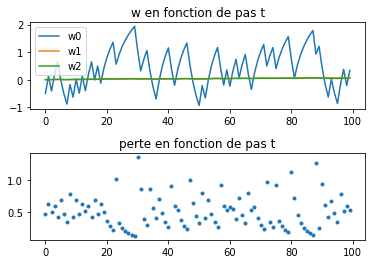

Constant 0.1


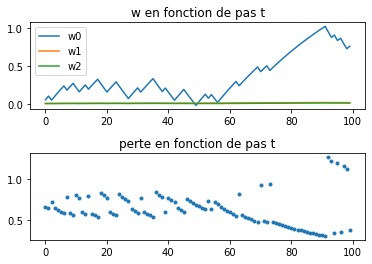

Constant 0.01


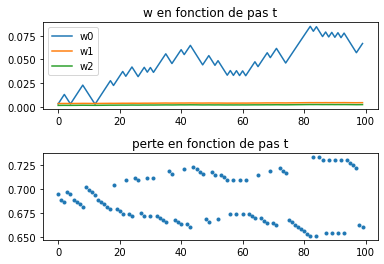

Constant 0.001


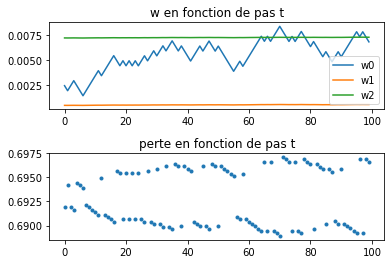

Inverse


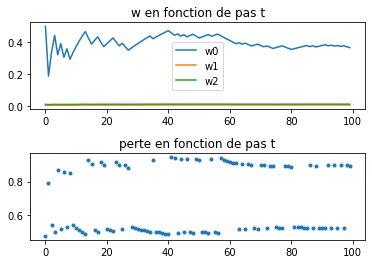

Racine


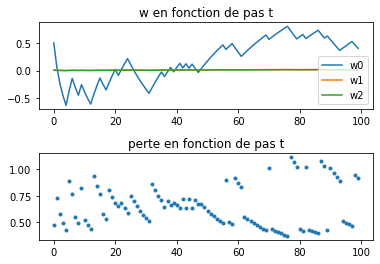

In [16]:
X = X * [1, 0.01, 0.01]

def pas_constant1(t): return 1
def pas_constant01(t): return 0.1
def pas_constant001(t): return 0.01
def pas_constant0001(t): return 0.001
def pas_inverse(t): return 1/(1+t) # 1+t afin d'éviter la division par 0 quand t=0
def pas_racine(t): return 1/np.sqrt(1+t)

nombre_de_pas = 100

print("Constant 1")
Ws, Ls = SGD(X, Y, nombre_de_pas, pas_constant1)
visualisation(Ws, Ls)

print("Constant 0.1")
Ws, Ls = SGD(X, Y, nombre_de_pas, pas_constant01)
visualisation(Ws, Ls)

print("Constant 0.01")
Ws, Ls = SGD(X, Y, nombre_de_pas, pas_constant001)
visualisation(Ws, Ls)

print("Constant 0.001")
Ws, Ls = SGD(X, Y, nombre_de_pas, pas_constant0001)
visualisation(Ws, Ls)

print("Inverse")
Ws, Ls = SGD(X, Y, nombre_de_pas, pas_inverse)
visualisation(Ws, Ls)

print("Racine")
Ws, Ls = SGD(X, Y, nombre_de_pas, pas_racine)
visualisation(Ws, Ls)

